# Chapter 4
## Section: Bias and variance diagnosis
This code helps you to practice with bias and variance analysis using performance of a random forest model across different maximum depths of trees. \\
We first import the required libraries.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score as bacc
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

Then we load the breats cancer dataset from scikit-learn and train and test multiple randomf forest models across different maximum depths of trees of the forests. We simplify go over the depths using a `for` loop.

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

maximum_depth = 15
depth_range = range(1, maximum_depth)

bacc_train = []
bacc_test = []
log_loss_train = []
log_loss_test = []
for depth_iter in depth_range:
  # initializing an fitting a decision tree model
  model_fit = RF(n_estimators = 5, max_depth = depth_iter, random_state=10).fit(X_train, y_train)
  # generating label outputs of train and test set using the trained model
  train_y_labels = model_fit.predict(X_train)
  test_y_labels = model_fit.predict(X_test)
  # generating probability outputs of train and test set using the trained model
  train_y_probs = model_fit.predict_proba(X_train)
  test_y_probs = model_fit.predict_proba(X_test)
  # calculating balanced accuracy
  bacc_train.append(bacc(y_train, train_y_labels))
  bacc_test.append(bacc(y_test, test_y_labels))
  # calculating log-loss
  log_loss_train.append(log_loss(y_train, train_y_probs))
  log_loss_test.append(log_loss(y_test, test_y_probs))

Then we plot balanced accuracy (following plot) and log-loss as a measure of loss (the plot after) across different tested maximum depths.

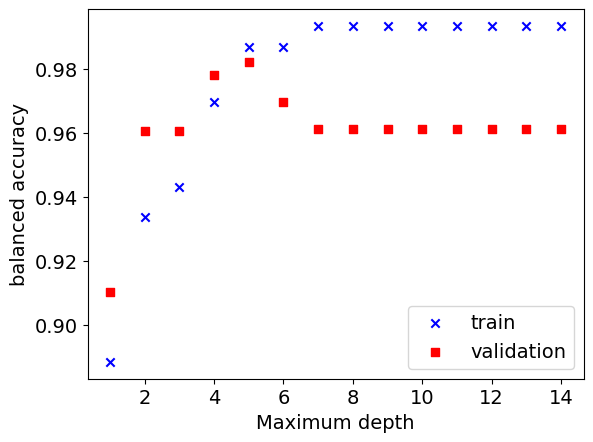

In [ ]:
plt.scatter(depth_range, bacc_train, c='b', marker='x', label='train')
plt.scatter(depth_range, bacc_test, c='r', marker='s', label='validation')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc='lower right', fontsize = 14)
plt.ylabel('balanced accuracy', fontsize = 14)
plt.xlabel('Maximum depth', fontsize = 14)
plt.show()

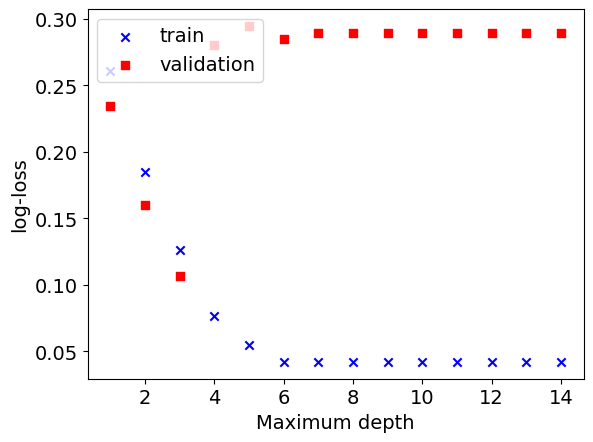

In [ ]:

plt.scatter(depth_range, log_loss_train, c='b', marker='x', label='train')
plt.scatter(depth_range, log_loss_test, c='r', marker='s', label='validation')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', fontsize = 14)
plt.ylabel('log-loss', fontsize = 14)
plt.xlabel('Maximum depth', fontsize = 14)
plt.show()